# Цель проекта.

Наша задача -  отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике.

#### Задачи:

1. Проверить качество данных и при необходимости выполнить очистку.


2. Сформулировать предположения и гипотезы для дальнейшего построения модели, которая предсказывала бы результаты госэкзамена по математике.


3. Определиться с параметрами для будующей модели.


## Описание датасета

1 `school` — аббревиатура школы, в которой учится ученик

2 `sex` — пол ученика ('F' - женский, 'M' - мужской)

3 `age` — возраст ученика (от 15 до 22)

4 `address` — тип адреса ученика ('U' - городской, 'R' - за городом)

5 `famsize` — размер семьи('LE3' <= 3, 'GT3' >3)

6 `Pstatus` — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 `Medu` — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 `Fedu` — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 `Mjob` — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 `Fjob` — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 `reason` — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 `guardian` — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 `traveltime` — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 `studytime` — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 `failures` — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 `schoolsup` — дополнительная образовательная поддержка (yes или no)

17 `famsup` — семейная образовательная поддержка (yes или no)

18 `paid` — дополнительные платные занятия по математике (yes или no)

19 `activities` — дополнительные внеучебные занятия (yes или no)

20 `nursery` — посещал детский сад (yes или no)

21 `higher` — хочет получить высшее образование (yes или no)

22 `internet` — наличие интернета дома (yes или no)

23 `romantic` — в романтических отношениях (yes или no)

24 `famrel` — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 `freetime` — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 `goout` — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 `health` — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 `absences` — количество пропущенных занятий

29 `score` — баллы по госэкзамену по математике

In [1]:
# импортируем нужные для чтения и первичного анализа библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 30) # показывать больше колонок


In [2]:
# прочитаем файл с исходными данными
df = pd.read_csv('stud_math.csv')


In [3]:
# Функции, применяемые в работе

''' Функция вывода информации по датасету - чисдо записей и число столбцов'''


def df_info():
    print(f'Всего записей в датасете: {len(df)}')
    print(f'Всего столбцов: {len(df.columns)}')


'''Функция вывода абсолютного и относительного количества
    пропущенных значений для столбца col из df, а также какие
    уникальные значения у нас есть и их количество'''


def data_quality(col):
    # подсчитаем число пропущенных значений
    nan_entrys = df[col].isnull().sum()
    # выведем количество пропущенных значений
    return (print('Для показателя', col, 'количество пропущенных значений:',
                  nan_entrys, 'из', len(df), '\nВ пропущенных значениях',
                  round(nan_entrys/len(df)*100, 1), '% записей.',
                  '\nКоличество уникальных значений:',
                  len(df[col].value_counts())),

            display(df[col].unique(),         # уникальные значения
                    df[col].value_counts()))


''' Функция вывода графика для столбца col типа Seaborn.countplot, где
    col - столбец из df; size - размер области графика;
    rotx - угол поворота подписей для оси x '''


def count_plot(col, size=(5, 5), rotx=0):
    plt.figure(figsize=size)     # размер области графика
    sns.set(style='darkgrid',    # стиль фона графиков в seaborn
            font_scale=1.2)      # размер шрифта для лучшей читаемости
    plot = sns.countplot(data=df, x=col)   # объект с графиком
    for xlabel in plot.get_xticklabels():  # цикл с метками на оси x
        xlabel.set_rotation(rotx)          # поворот меток на угол rotx
    return plot.set_title(col, size=20);


''' Функция вывода  графика Seaborn.boxplot, отображающего распределение
    значений столбца по отношению к целевому признаку, где
    colx - название анализируемого столбца из df,
    coly - столбец с целевым признаком из df,
    size - размер области графика,
    rotx - угол поворота подписей для оси x '''


def box_plot(colx, coly, size=(5, 5), rotx=0):
    plt.figure(figsize=size)  # размер области графика
    sns.set(style='darkgrid',      # стиль фона графиков в seaborn
            font_scale=1.2)        # размер шрифта для лучшей читаемости
    plot = sns.boxplot(data=df,    # объект с графиком
                       x=colx,
                       y=coly,
                       fliersize=8)
    for xlabel in plot.get_xticklabels():  # цикл с метками на оси x
        xlabel.set_rotation(rotx)          # поворот меток на угол rotx
    return plot.set_title(colx, size=20);



''' Вывод информации по категориям '''


def display_data(col, size=(5, 5)):
    print('======================================',
          f'\n|  Данные для показателя {col}',
          '|\n======================================')
    data_quality(col)
    count_plot(col, size)

''' Функция изменяющая значения в столбце col из df на 0 и 1,
    если эти значения бинарные '''


def fix_binary(col, zero, one):
    df[col] = df[col].apply(lambda x:
                            0 if x==zero else
                            1 if x==one else
                            x)


''' функция изменяющая записи для показателей mother_edu и father_edu
    с текстовых на числовые '''


def fix_job(col):
    df[col] = df[col].apply(lambda x: 4 if x=='teacher'
                            else 3 if x=='health'
                            else 2 if x=='services'
                            else 1 if x=='at_home'
                            else 0 if x=='other'
                            else x)


''' Функция, удаляющая столбец c заданным именем из df '''


def del_column(col):
    df.drop([col], axis='columns', inplace=True)


''' Функция обнаруживающая и выводящая значения в массиве (df.col)б
    которые попадают под выбросы '''


def outliers(col):
    q1 = df[col].quantile(0.25)  # нижний квартиль
    q3 = df[col].quantile(0.75)  # верхний квартиль
    iqr = q3-q1                  # межквартильный размах
    min_outlier = q1-iqr * 1.5   # нижний выброс
    max_outlier = q3+iqr * 1.5   # верхний выброс
    print('Массив "{}":\n min outlier:\n{}\n max outlier:\n{}'.format
         (col, df[col][df[col] < min_outlier],
          df[col][df[col] > max_outlier]),
          f'\n\nГраницы выбросов: [{min_outlier}, {max_outlier}].')


''' Функция округления оценки до числа кратного 5,
    например: 11, 12 до 10; 13, 14 до 15 '''


def round_5(x):
    delta = x % 5
    if delta == 0:            # если число кратное 5
        return x              # оставляем без изменения
    elif 1 <= delta <= 2:     # если остаток от деления 1 или 2
        x -= delta            # округляем до десятков
        return x              # получаем округленное до 0 в конце
    elif 3 <= delta <= 4:     # если остаток от деления 3 или 4
        modifed = x + 5       # увеличиваем текущее число на 5
        x = modifed - delta   # и отнимаем остаток от деления
        return x              # получаем округленное до 5 в конце


''' Функция для возвращения строковых значений в столбце col в df, если в них  текущие значения числовые от 0 до 5 '''


def restore_str(col, val0=None,
                     val1=None,
                     val2=None,
                     val3=None,
                     val4=None,
                     val5=None):
    df[col] = df[col].apply(lambda x:
                            val0 if x==0 else
                            val1 if x==1 else
                            val2 if x==2 else
                            val3 if x==3 else
                            val4 if x==4 else
                            val5 if x==5 else
                            x)


## 1. Первичный осмотр данных

### 1.1. Предобработка датасета

In [4]:
df_info()


Всего записей в датасете: 395
Всего столбцов: 30


Посмотрим на данные в нашем датасете, для этого выведем 10 случайных строк:

In [5]:
display(df.sample(10))  # вывели 10 случайных строк из датасета


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
370,MS,F,19,U,LE3,T,3.0,2.0,services,services,home,other,2.0,2.0,2.0,no,no,no,yes,yes,-6.0,yes,no,yes,3.0,2.0,2.0,3.0,4.0,45.0
83,GP,M,15,U,LE3,T,2.0,2.0,services,services,home,mother,2.0,2.0,0.0,no,no,yes,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,4.0,4.0,75.0
124,GP,F,16,U,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,yes,no,yes,-6.0,yes,yes,yes,5.0,4.0,4.0,5.0,0.0,40.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
304,GP,M,19,U,GT3,T,3.0,3.0,other,other,home,other,1.0,2.0,1.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,20.0,65.0
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
351,MS,M,17,U,GT3,T,3.0,3.0,health,other,course,mother,2.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,5.0,4.0,3.0,2.0,65.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0


Из полученной информации видно, что:

  1. Столбцы именуются как с заглавной буквы, так и польность строчными буквами.


  2. Данные представлены в виде текста, целых чисел и дробных. Текстовые данные представлены в различном регистре. Имеются пустые значения (NaN).

#### 1.1.1. Перевод в нижний регистр заголовков и данных.

In [6]:
# преобразуем заголовки столбцов в нижний регистр
df.columns = df.columns.str.lower()


In [7]:
# преобразуем текстовые данные в столбцах (тип object) в нижний регистр
for col in df.columns:                 # для столбцов в df
    if df[col].dtype == 'O':           # если тип данных Object
        # перевод запсей в столбце в нижний регистр
        df[col] = df[col].str.lower()


Выведем информацию по нашим данным

In [8]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

В нашем датасете:

1 столбец с типом данных int64 (целое число);

12 столбцов с типом float64 (десятичная дробь);

17 столбцов с типом object (текст).


#### 1.1.2. Переименование столбцов

Переименуем названия столбцов в более удобные и понятные:

In [9]:
# создадим словарь где значение - новое название столбца
renamed_columns = {'school': 'school',
                   'sex': 'sex',
                   'age': 'age',
                   'address': 'address',
                   'famsize': 'family_size',       # famsize to family_size
                   'pstatus': 'parents_status',    # pstatus to parent_status
                   'medu': 'mother_edu',           # medu to mother_edu
                   'fedu': 'father_edu',           # fedu to father_edu
                   'mjob': 'mother_job',           # mjob to mather_job
                   'fjob': 'father_job',           # fjob to father_job
                   'reason': 'reason',
                   'guardian': 'guardian',
                   'traveltime': 'traveltime',
                   'studytime': 'studytime',
                   'failures': 'failures',
                   'schoolsup': 'school_support',  # to school_support
                   'famsup': 'family_support',     # to family_support
                   'paid': 'paid',
                   'activities': 'activities',
                   'nursery': 'nursery',
                   'studytime, granular': 'studytime, granular',
                   'higher': 'higher_purpose',        # to higher_purpose
                   'internet': 'internet',
                   'romantic': 'romantic',
                   'famrel': 'family_relationships',  # to family_relationships
                   'freetime': 'freetime',
                   'goout': 'friends_time',           # to friends_time
                   'health': 'health',
                   'absences': 'absences_lessions',   # to absences_lessions
                   'score': 'score'}


In [10]:
# преименуем столбцы
df.rename(columns=renamed_columns, inplace=True)


#### 1.1.3. Удаление `studytime, granular`

В датасете есть столбец с именем `studytime, granular`, который отсутствует в описании. Его название схоже со столбцом `studytime`. Сравним данные в этих столбцах:

In [11]:
(df['studytime'] == df['studytime, granular']).value_counts()


False    395
dtype: int64

Значения в столбцах разные. Проверим на корреляцию:

In [12]:
df[['studytime', 'studytime, granular']].corr()


,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


Наблюдается полная корреляция между `studytime` и `studytime, granular`.

Учитывая данные факты, столбец `studytime, granular` не несёт полезной для нас информации и его можно удалить:

In [13]:
del_column('studytime, granular')  # здесь и далее функция del_columns


### 1.2. Анализ данных в столбцах датасета и определение не соответствующих условию заадачи.

#### 1.2.1. `age`

Так как целью проекта является определение условий жизни на оценку по математике, показатель __возраста ученика (`age`)__ не подходит для задания. Не смотря на то, что теоретически возраст мог бы влиять на результат оценки, он относится к биологическим показателям и следовательно его необходимо __исключить__ из факторов, влияющих на оценку в будущей модели.

In [14]:
# удалим столбец age
del_column('age')


Данные о поле учеников (`sex`), также, как и данные о их возрасте относятся к биологическим показателям и, соответственно, не соответствуют поставленному условию. Но всё равно попробуем оценить насколько возраст влияет на оценку ученика:

|  Данные для показателя sex |
Для показателя sex количество пропущенных значений: 0 из 395 
В пропущенных значениях 0.0 % записей. 
Количество уникальных значений: 2


array(['f', 'm'], dtype=object)

f    208
m    187
Name: sex, dtype: int64

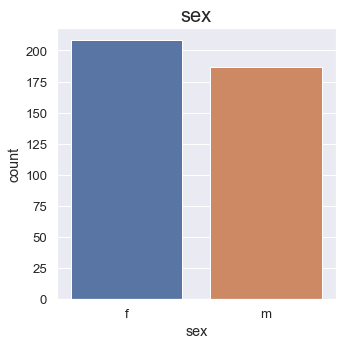

In [15]:
display_data('sex', size=(5, 5))

Text(0.5, 1.0, 'sex')

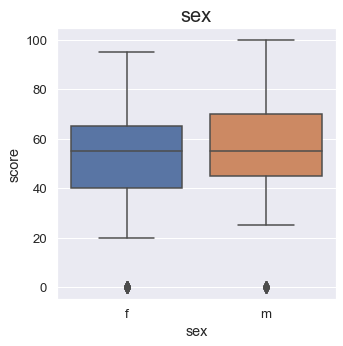

In [16]:
box_plot('sex', 'score')

Как видно, влияние пола есть, но оно не значительное. Следовательно, принимаем решение удалить этот показатель.

In [17]:
# удалим столбец sex
del_column('sex')


#### 1.1.5. Изменение формата данных для бинарных показателей.

У нас много бинарных показателей, где используются варианты из `'yes'` и `'no'`.

Для удобства оценки таких данных заменим в датасете `'yes'` на `1` и `'no'` на `0`:


In [18]:
for col in df.columns:
    fix_binary(col, 'no', 'yes')  # функция fix_binary


Есть ещё и другие показатели ссостоящие из двух вариантов значений, где используются не yes и no, а другие данные, но мы пока их трогать не будем. Если потребуется привести их числовому формату, то можно будет сделать это отдельно.

In [19]:
# посмотрим на данные после предобработки
display(df.sample(10))


,school,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher_purpose,internet,romantic,family_relationships,freetime,friends_time,health,absences_lessions,score
132,gp,u,le3,t,2.0,2.0,other,other,course,father,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,1.0,3.0,4.0,4.0,5.0,12.0,60.0
229,gp,u,gt3,a,2.0,1.0,other,NaN,course,mother,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,3.0,3.0,10.0,60.0
119,gp,u,gt3,t,3.0,4.0,other,other,reputation,father,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,4.0,3.0,4.0,6.0,65.0
349,ms,r,gt3,t,3.0,NaN,other,other,course,NaN,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,5.0,5.0,5.0,10.0,65.0
306,gp,u,gt3,a,3.0,2.0,services,other,course,other,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,5.0,3.0,5.0,0.0,90.0
391,ms,u,le3,t,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
171,gp,u,gt3,t,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,4.0,3.0,2.0,3.0,2.0,80.0
127,gp,u,gt3,t,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,2.0,5.0,2.0,45.0
256,gp,u,le3,t,4.0,2.0,teacher,services,reputation,mother,1.0,4.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,0.0,4.0,2.0,3.0,NaN,6.0,65.0
228,gp,u,NaN,t,2.0,1.0,at_home,other,course,mother,4.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,2.0,3.0,14.0,45.0


In [20]:
# выведем информацию по датасете после предобработки
df_info()


Всего записей в датасете: 395
Всего столбцов: 27


### 1.2. Оценка качества данных

### 1.2.1. Оценка целевого показателя.

### `score`

Оценка по госэкзамену по математике.

Оценка по математике - целевой показатель для построения нашей модели, по-этому проанализируем параметр `score` впервую очередь, т.к. в дальнейшем нам придется сравнивать с ним остальные параметры, чтобы понять их влияние на эту самую оценку.

|  Данные для показателя score |
Для показателя score количество пропущенных значений: 6 из 395 
В пропущенных значениях 1.5 % записей. 
Количество уникальных значений: 18


array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

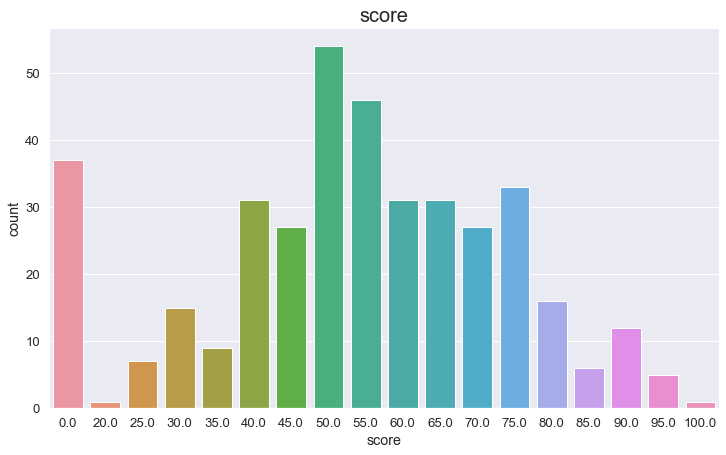

In [21]:
display_data('score', size=(12, 7))  # здесь и далее функция display_data


Как видно, в массиве у нас данные по оценкам представлены в виде целых чисел с шагом 5, а тип данных float обусловлен наличием пустых значений (NaN), которых у нас `6`, что составляет `1.5%` от всех даннных.

Очевидно, оценка по госэкзамену выставляется по 100-бальной шкале. При этом у нас довольно большое число учеников (`37`) с оценкой `0`. На графике видно, что оценка 0 выбивается из общего распределения признака и является не характерной.

Из полученной информации также видно, что у нас есть уникальные значения - по одному школьнику сдали экзамен с оценкой `20` и `100` баллов соответственно.


Т.к. оценка (`score`) у нас целевой признак, надо удалить пустые значения. Передсказать оценку мы сейчас не сможем, т.к. этим в дальнейшем должна заниматься модель, для которой мы подготавливаем анализ.

In [22]:
df.dropna(subset=['score'], inplace=True)


In [23]:
# удалим записи с оценкой 0.
# df = df[df.score > 0]
# пока не удаляем!


Проверим оценки на наличие выбросов:

In [24]:
outliers('score')  # функция outliers


Массив "score":
 min outlier:
Series([], Name: score, dtype: float64)
 max outlier:
Series([], Name: score, dtype: float64) 

Границы выбросов: [-5.0, 115.0].


__Удалим уникальные оценки__ (полученные мене чем 5 школьниками), т.к. для них не достаточно сравнительных вариаций. Обычно для успешного решения какой-либо проблемы нет одного единственного верного плана действий. Всегда существуют какие-то факторы которые ввиду определенных отличий начинают идти другим путем, но всё равно в конце выходят к тому же конкретному результату.

Ко всему тому же у нас есть куда более интересные показатели - это оценки минимальная оценка после 20 - __`25`__ (о которой у нас 7 записей) и очень высокая оценка, предшествующая 100 - __`95`__ (о которой у нас 5 записей).

7 и 5 это конечно же очень мало, но гораздо лучше чем 1. Здесь у нас есть шанс проверить на совпадающие признаки и возможно выявить какие-то факторы, которые могут как получать талантливых математиков, так определение рекомендаций для родителей какие факторы стоит избегать, если они хотят "подтянуть" успеваемость для своего ребёнка.

Как говорится в одной шутке: _Один раз - случайность. Два раза - совпадение. Три раза - закономерность._

In [25]:
# удалим уникальные значения - 20 и 100
df = df[(df.score != 20) & (df.score != 100)]


__Что же с оценкой `0`?__

Минимальная оценка означает, что ни один из вопросов на экзамене не был решён учеником. Такое крайне мало вероятно, если не были нарушены учеником на экзамене какие-то правила (например списывание). Ещё возможный вариант событий получить за экзамен оценку `0`, если ученик не явился на экзамен или отказался сдавать экзаменационную работу.

__Удалим записи с оценкой `0`.__

In [26]:
df = df[~(df.score==0)]


In [27]:
df_info()


Всего записей в датасете: 350
Всего столбцов: 27


--------------------------------
### 1.2.2. `school`

Так как инициатор проекта UNICEF, становится вполне очевидным, что модель для предсказания оценки будет применяться для учеников многих других школ, а не только для тех, коотрые есть в предоставленной выборке. При этом мы не можем отрицать влияния како-то конкретной школы и чего-то, что с ней связано на итоговую оценку.

|  Данные для показателя school |
Для показателя school количество пропущенных значений: 0 из 350 
В пропущенных значениях 0.0 % записей. 
Количество уникальных значений: 2


array(['gp', 'ms'], dtype=object)

gp    309
ms     41
Name: school, dtype: int64

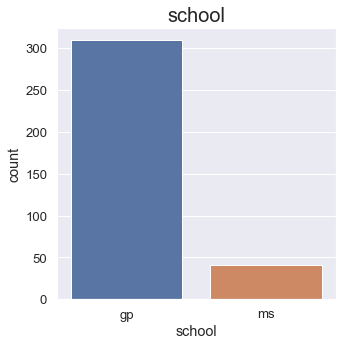

In [28]:
# выведем информацию по записям о школе
display_data('school')


Text(0.5, 1.0, 'school')

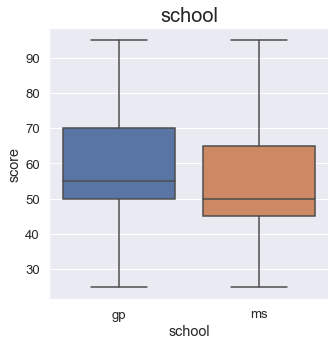

In [29]:
# распределение данных о школе по значению  оценки по математике
box_plot('school', 'score', size=(5, 5))


В датасете всего две школы, при этом число учеников от школы MS значительно меньше, чем от школы GP. Такие данные не отвечают поставленным условиям, к тому же по графикам видно, что средние значения  оценки по математике слабо отличаются между школами. И даже оценка `0` присутствует в обеих школа, но только с той лишь разницей, что в школе MS оценка `0` стала выбросом, но это связано опять же с очень малым числом школьников, данные по которым участвуют в нашем исследовании.

По этому мы принимаем решение __исключить информацию о школе__ в поиске факторов влияющих на оценку.

In [30]:
# удалим столбец school
del_column('school')


-----------------------
------------------------
Проверим на пропуски остальные показатели:

In [31]:
null_counts = df.isna().sum().sort_values()

for name in null_counts.index:
    print('{}\t\t\t{} - {}%'.format
          (name,
           null_counts[name],
           (null_counts[name] * 100 / len(df)).round(1)))


score			0 - 0.0%
mother_edu			2 - 0.6%
friends_time			6 - 1.7%
studytime			7 - 2.0%
freetime			8 - 2.3%
school_support			9 - 2.6%
absences_lessions			10 - 2.9%
activities			12 - 3.4%
nursery			12 - 3.4%
health			13 - 3.7%
address			14 - 4.0%
reason			15 - 4.3%
mother_job			17 - 4.9%
higher_purpose			19 - 5.4%
failures			20 - 5.7%
father_edu			21 - 6.0%
traveltime			23 - 6.6%
family_relationships			24 - 6.9%
family_size			24 - 6.9%
guardian			29 - 8.3%
internet			29 - 8.3%
romantic			29 - 8.3%
father_job			30 - 8.6%
family_support			36 - 10.3%
paid			36 - 10.3%
parents_status			41 - 11.7%


Как видно после предварительной обработки у нас, почти во всех столбцах, кроме оценки, есть пустые значения.

Чем меньше пропусков будет в наших данных, тем точнее будет работать наша будущая модель. По-этому начнём анализировать данные от самых простых случаев, когда пустых значений у нас меньше всего по возрастанию к самым сложным, когда пустых значений становится много.

------------------------
###  1.2.3. `mother_edu`

Образование матери ученика.

0 - нет,

1 - 4 класса,

2 - 5-9 классы,

3 - среднее специальное или 11 классов,

4 - высшее

|  Данные для показателя mother_edu |
Для показателя mother_edu количество пропущенных значений: 2 из 350 
В пропущенных значениях 0.6 % записей. 
Количество уникальных значений: 5


array([ 4.,  1.,  3.,  2., nan,  0.])

4.0    123
2.0     88
3.0     87
1.0     47
0.0      3
Name: mother_edu, dtype: int64

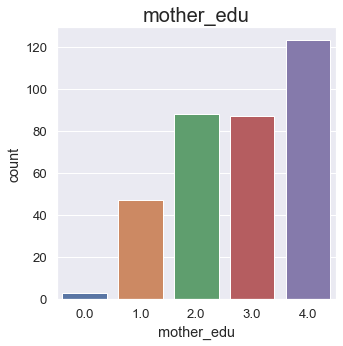

In [32]:
display_data('mother_edu')


Количество пропущенных данных менее 1% - показатель не идеальный, но вполне хороший.

Уровень образования обозначен кодами - циифрами от 0 до 4.
Нехарактерные значения отсутствуют.

In [33]:
df[['mother_edu', 'score']].corr()


,mother_edu,score
mother_edu,1.000000,0.189647
score,0.189647,1.000000


Text(0.5, 1.0, 'mother_edu')

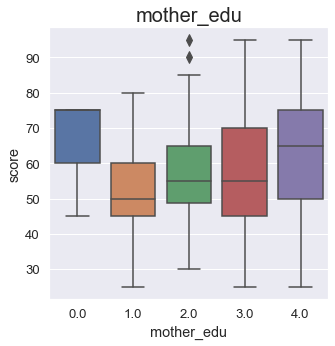

In [34]:
# посмотрим на то как связан уровень образования матери с оценками
box_plot('mother_edu', 'score')


Как видно, при наличии образования у матери наблюдается возростающий тренд оценок по экзамену.

При этом отсутствие образования у матери выбивается, при чём в сторону улучшения оценок. ___Но при этом есть ограничение максимальной оценки.___



In [35]:
# отфильтруем датасет по значению, где образование у матери минимальное или
# запись о образовании отсутствует
mother_edu_0 = df[(df.mother_edu==0)|(df.mother_edu.isnull())]
mother_edu_0


,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher_purpose,internet,romantic,family_relationships,freetime,friends_time,health,absences_lessions,score
92,NaN,le3,t,NaN,1.0,other,other,home,father,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,NaN,2.0,4.0,30.0
127,u,gt3,t,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,2.0,5.0,2.0,45.0
193,r,gt3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,2.0,5.0,8.0,50.0
249,u,gt3,t,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0,0.0,4.0,3.0,2.0,5.0,0.0,75.0
324,u,le3,t,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,3.0,2.0,0.0,75.0


Первое о чем можно подумать, когда говорим о образовании человека -  это на сколько сложную работу он сможет выполнять и уровень его компетентности.

Сравним визуально в отфильтрованном датасете:

- _образование матери_
- _работа матери_
- _образование отца_ - чаще всего образование матери совпадает или близко с образованием отца
- _работа отца_
- ___оценки по экзамену___ - на графике мы видим зависимость оценок от уровня образования матери



In [36]:
mother_edu_0[['mother_edu',
              'mother_job',
              'father_edu',
              'father_job',
              'score']]


,mother_edu,mother_job,father_edu,father_job,score
92,NaN,other,1.0,other,30.0
127,0.0,at_home,1.0,other,45.0
193,NaN,services,3.0,services,50.0
249,0.0,other,2.0,other,75.0
324,0.0,at_home,2.0,at_home,75.0


Первая запись c индексом _92_:

_Заменим пустой показатель по образованию матери на 1_ - показатели этой записи близки с показателями следующей записи, где разная только работа матери. Образование отца может также определять образование матери.


In [37]:
df.loc[92, 'mother_edu'] = 1.0


Запись с индексом _193_:

_Заменим пустой показатель по образованию матери на 3_ - оценка схожа с характерной оценкой для такого уровня образования матери, образование отца подходит под наше предположение, работа отца и матери совпадает.

In [38]:
df.loc[193, 'mother_edu'] = 3.0


запись c индексом _239_:

_Заменим пустой показатель по образованию матери на 2_ - характерно для оценки 0 по экзамену, образованию отца, работе матери.


-----------------
###  1.2.4. `friends_time`

Время, коотрое проводит ученик с друзьями (оно же `goout`в исходном датасете) - от 1 до 5. Чем выше число, те больше времени ученик проводит с друзьями.


|  Данные для показателя friends_time |
Для показателя friends_time количество пропущенных значений: 6 из 350 
В пропущенных значениях 1.7 % записей. 
Количество уникальных значений: 5


array([ 4.,  3.,  2.,  1.,  5., nan])

3.0    118
2.0     91
4.0     74
5.0     42
1.0     19
Name: friends_time, dtype: int64

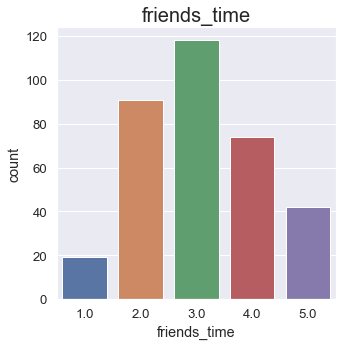

In [39]:
# выведем информацию по friends_time
display_data('friends_time')


Посмотрим распределение по ключевому показателю - оценке за экзамен.

Text(0.5, 1.0, 'friends_time')

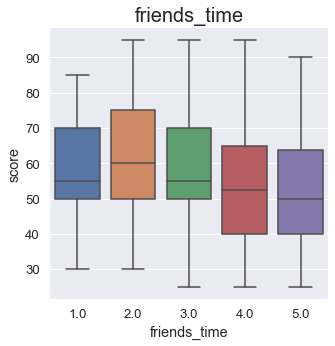

In [40]:
box_plot('friends_time', 'score')


Видно, что для показателей "дружбы" от 1 до 3 оценка за экзамен мало меняется. При показателях "дружбы" от 4 до 5 средние значения оценки падают.

Проверим на корреляцию время на друзей и оценку по экзамену:

In [41]:
df[['friends_time', 'score']].corr()


,friends_time,score
friends_time,1.000000,-0.166846
score,-0.166846,1.000000


Можно сделать вывод - чем больше времени тратится на друзей, тем меньше остается на учебу, что сказывается на итоговой оценке. Но показатели коррелирует слабо, т.к. при значении "2" средняя оценка по математике - 60 баллов, а при показателе "1" средняя оценка такая же, как при показателе "3" - 55 баллов.

Заполним пустые значения:

In [42]:
# cгруппируем friends_time по средней оценке по математике, округленной до целых
grouped_friends_time = df.groupby(['friends_time'])['score'].mean().round()
# маска для определения параметра friends_time
display(grouped_friends_time.sort_values())


friends_time
4.0    54.0
5.0    54.0
3.0    59.0
1.0    60.0
2.0    61.0
Name: score, dtype: float64

In [43]:
# отфильтруем df по NaN в friends_time
df[df.friends_time.isnull()]

# заменим NaN в friends_time по маске
# для индекса df, где NaN в friends_time
for index in df[df.friends_time.isnull()].index:
    # если оценка в df с индексом index меньше или равно 45.0
    if df.loc[index].score <= 45.0:
        # перепишем NaN в friends_time на 5.0
        df.loc[index, 'friends_time'] = 5.0
    # если оценка в df с индексом index меньше или равно 55.0
    elif 45 < df.loc[index].score <= 55:
        # перепишем NaN в friends_time на 4.0
        df.loc[index, 'friends_time'] = 4.0
    # если оценка в df с индексом index больше 55.0
    elif df.loc[index].score > 55:
        # перепишем NaN в friends_time на 2.0
        df.loc[index, 'friends_time'] = 2.0


### 1.2.5. `studytime`

Время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

|  Данные для показателя studytime |
Для показателя studytime количество пропущенных значений: 7 из 350 
В пропущенных значениях 2.0 % записей. 
Количество уникальных значений: 4


array([ 2.,  3.,  1., nan,  4.])

2.0    172
1.0     90
3.0     58
4.0     23
Name: studytime, dtype: int64

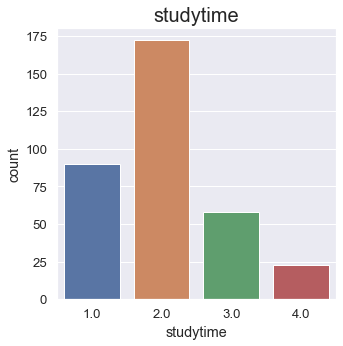

In [44]:
display_data('studytime')


Text(0.5, 1.0, 'studytime')

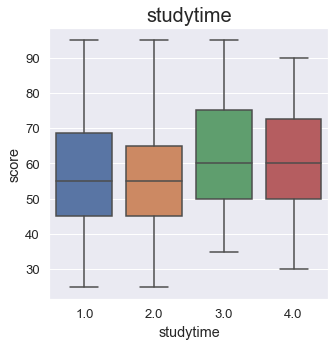

In [45]:
box_plot('studytime', 'score')


График позволяет предположить, что дполнительные занятия после школы до 5-10 часов помогают увеличить среднюю оценку по экзамену, однако более долгие занятия (свыше 10 часов) вызывают снижение оценки. Это может быть связано с переутомлением.

In [46]:
df.corr().studytime.sort_values()

failures               -0.156088
freetime               -0.121346
traveltime             -0.098013
health                 -0.079285
absences_lessions      -0.029209
friends_time           -0.020090
school_support          0.014360
father_edu              0.048454
mother_edu              0.063232
family_relationships    0.063854
romantic                0.072332
nursery                 0.073584
internet                0.092639
activities              0.097221
score                   0.127222
higher_purpose          0.144109
family_support          0.160557
paid                    0.208420
studytime               1.000000
Name: studytime, dtype: float64

Сравним время на учебу помимо в школе с данными по количеству внеучебных неудач;

Text(0.5, 1.0, 'studytime')

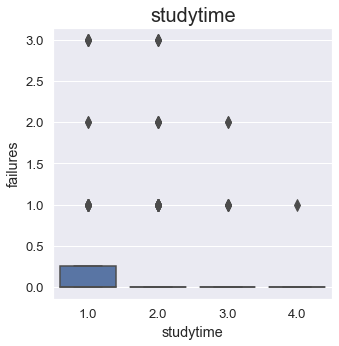

In [47]:
box_plot('studytime', 'failures')

По графику видно, что внеучебные неудачи сопутствуют ученикам, меньше всего затратившим время на дополнительное обучение.

Заменим пустые значения в данных о времени на учебу помимо школы:
- 3.0, если внеучебных неудач не было,
- 1.0, если неудачи были хотябы один раз.

In [48]:
for index in df[df.studytime.isnull()].index:
    if df.loc[index].failures > 0:
        df.loc[index, 'studytime'] = 3.0
    else:
        df.loc[index, 'studytime'] = 0


### 1.2.6 `freetime`

Свободное время после школы.


|  Данные для показателя freetime |
Для показателя freetime количество пропущенных значений: 8 из 350 
В пропущенных значениях 2.3 % записей. 
Количество уникальных значений: 5


array([ 3.,  2.,  4.,  1.,  5., nan])

3.0    132
4.0    101
2.0     58
5.0     35
1.0     16
Name: freetime, dtype: int64

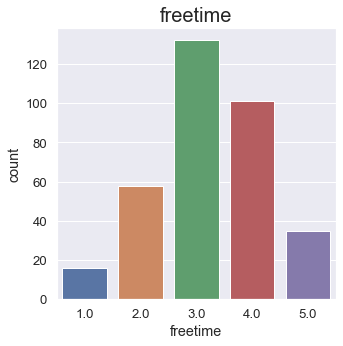

In [49]:
# посмотрим на данные по свободному времени
display_data('freetime')


Заменим пустые значения для freetime.

Как мы уже знаем, количество свободного времени зависит прямопропорционально от времени потраченном на друзей и обратнопропорционально времени затраченного на учебу вне школы.

In [50]:
df[df.freetime.isnull()][['freetime', 'friends_time', 'studytime']]


,freetime,friends_time,studytime
32,NaN,2.0,2.0
74,NaN,3.0,2.0
280,NaN,4.0,1.0
290,NaN,2.0,2.0
291,NaN,2.0,3.0
311,NaN,1.0,2.0
314,NaN,2.0,3.0
338,NaN,3.0,4.0


Приcвоим пустым значениям freetime, соответствующие значения friends_time:

In [51]:
for index in df[df.freetime.isnull()].index:
    df.loc[index, 'freetime'] = df.loc[index, 'friends_time']

### 1.2.7. `school support`

Дополнительная образовательная поддержка:
- 1 - yes,
- 0 - no.

|  Данные для показателя school_support |
Для показателя school_support количество пропущенных значений: 9 из 350 
В пропущенных значениях 2.6 % записей. 
Количество уникальных значений: 2


array([ 1.,  0., nan])

0.0    293
1.0     48
Name: school_support, dtype: int64

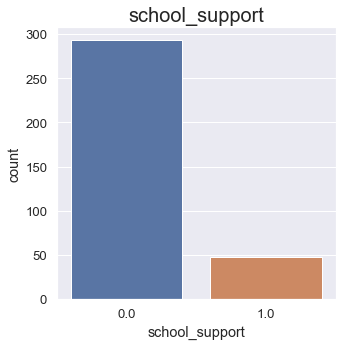

In [52]:
display_data('school_support')

Проверим с какими показателемя лучше всего коррелирует дополнительная образовательная поддержка от школы:

In [53]:
df.corr().school_support.sort_values()


score                  -0.254251
mother_edu             -0.069656
freetime               -0.044332
paid                   -0.038147
romantic               -0.037890
health                 -0.035391
friends_time           -0.019330
traveltime             -0.015231
family_relationships   -0.000125
father_edu              0.003282
internet                0.005344
studytime               0.014109
nursery                 0.033894
higher_purpose          0.039832
activities              0.062424
failures                0.067783
family_support          0.085918
absences_lessions       0.105350
school_support          1.000000
Name: school_support, dtype: float64

Как видно выше, больший коэфициент корреляции у school_cupport - это оценка по экзамену, при этом оценка обратно пропорциональна тому была ли у ученика образовательная поддержка или нет.

Построим боксплот и ойеним визуально эту корреляцию:

Text(0.5, 1.0, 'school_support')

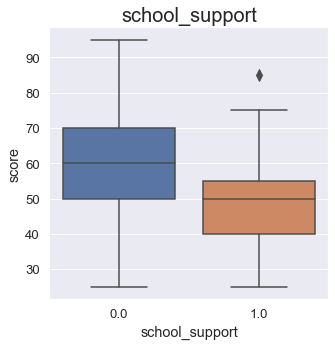

In [54]:
box_plot('school_support', 'score')

Первый очевидный вывод - образовательная поддержка от школы снижает оценку за экхамен по математике.

Несколько абсурдно, если действительно придерживаться такого вывода.

Однако из данных полученных выше, мы уже знаем, что учеников, получавших дополнительную образовательную поддержку значительно меньше - 48 человек, против 302, у которых этой поддержки не было.

Скорре всего эти 48 человек - школьники, коотрые отставали от программы обучения или испытывали трудности с математикой. Дополнительная образовательная поддержка (по сути консультации и дополнительные занятия в школе) были направлены на улучшение освоения курса по математике "слабыми" учениками.

Отсутствие нижних выбросов у таких учеников, говорит о том, что поддержка позволяет "подтянуть" на экзамене оценку по математике до чуть ниже средних значений. Верхний выброс, равный примерно 86 баллам за экзамен, говорит о том, что иногда такая поддержка может стать весьма эффективной.

Попробуем заполнить пустые записи для school_support.

In [55]:
# выведем среднюю оценку за экзамен для учеников, кто получал и не получал
# в школе дополнительную помолщь по математике
df.groupby(['school_support'])['score'].mean().round()


school_support
0.0    60.0
1.0    48.0
Name: score, dtype: float64

Если оценка по математике меньше 55, то это значит, что ученик получал дополнительную образовательную поддержку (`1`). Если оценка больше или равна 55, то поддержки не было (`0`)

In [56]:
# заполним NaN в school_support
for index in df[df.school_support.isnull()].index:
    if df.loc[index, 'score'] < 55:  # если оценка ниже 55
        df.loc[index, 'school_support'] = 1  # поддержка оказывалась
    elif df.loc[index, 'score'] >= 55: # если оценка 55 и выше
        df.loc[index, 'school_support'] = 0  # поддержки не было


### 1.2.8. `absences_lessions`

Количество пропущенных занятий

|  Данные для показателя absences_lessions |
Для показателя absences_lessions количество пропущенных значений: 10 из 350 
В пропущенных значениях 2.9 % записей. 
Количество уникальных значений: 36


array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
         3., 385.,  21.,   1.,  75.,  22.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

0.0      74
2.0      60
4.0      51
6.0      30
8.0      20
10.0     17
12.0     12
14.0     12
3.0       7
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
22.0      2
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences_lessions, dtype: int64

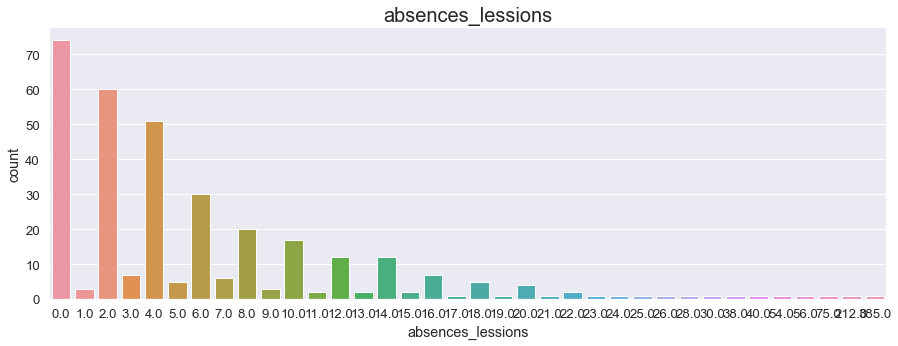

In [57]:
display_data('absences_lessions', size=(15, 5)) 

Данные по пропущенным урокам судя по всему содержат выбросы, так как есть очень большие показатели в 385 и 212 уроков.

Массив "absences_lessions":
 min outlier:
Series([], Name: absences_lessions, dtype: float64)
 max outlier:
40      25.0
74      54.0
89      18.0
103     26.0
118     20.0
123     18.0
183     56.0
198     24.0
203     18.0
205     28.0
222    385.0
234     18.0
237     20.0
260     21.0
276     75.0
277     22.0
280     30.0
281     19.0
304     20.0
307     38.0
309     18.0
311     20.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences_lessions, dtype: float64 

Границы выбросов: [-7.0, 17.0].


<AxesSubplot:xlabel='absences_lessions'>

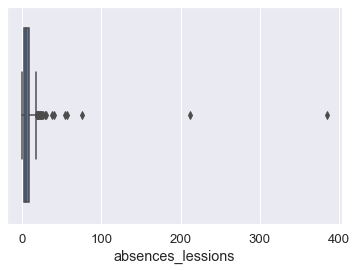

In [58]:
# проверим на выбросы
outliers('absences_lessions')  # вывели информацию по выбросам
sns.boxplot(data=df, x='absences_lessions')  # построили боксплот с прогулами


Как и предпологали, 385 и 212 - выбросы, но помимо них есть ещё другие данные, кооторые также попадают под выбросы. Первое о чем можно подумать - 385 и 212 пропущенных уроков - это ошибки ввода данных, таких высоких показателей не может быть.

Построим гепотезу, что если  385 и 212 уроков - это ошибки, а реальные значения?
Если это так, то таким показателям должны соответствовать другие данные:
- оценка по математике должна быть `0`
- если оценка по математике не `0`, то возможно ученик проходил обучение с репетитором, тогда у него не должно быть много свободного времени (`freetime`)


In [59]:
# выведем информацию для нашей гипотезы
df[df.absences_lessions > 100][['absences_lessions',
                                'score',
                                'freetime']]


,absences_lessions,score,freetime
222,385.0,85.0,3.0
390,212.0,45.0,5.0


Как видно, у учеников достаточно много свободного времени, а оценка по экзамену при этом сильно больше чем `0`. Следовательно будем считать показатели с 385 и 212 пропущенными уроками ошибками ввода.

Так как целевой показатель (`score`) в этих запясях у нас есть, удалять такие записи мы не будем.

In [60]:
# перепишем записи с выбросами на NaN
df.loc[222, 'absences_lessions'] = np.nan  # переписали 385 на NaN
df.loc[390, 'absences_lessions'] = np.nan  # переписали 212 на NaN


То же самое выполним для для значений, по которым очень мало записей (меньше пяти).

In [61]:
# посчитаем количество для каждого значения
absences_count = df.absences_lessions.value_counts()
# отфильтруем значения, которых меньше 5 и сформируем из них список
absences_count = absences_count[absences_count < 5].index.tolist()
# перепишем на NaN значения по прогулам, которых в датасете меньше 5
df.absences_lessions = df.absences_lessions.apply(lambda x: np.nan
                                                  if x in absences_count
                                                  else x)

Заменим пустые значения пропущенных занятий медианой:

In [62]:
absences_median = df.absences_lessions.median()  # медиана количества прогулов
df.absences_lessions = df.absences_lessions.apply(lambda x: absences_median
                                                  if pd.isnull(x)
                                                  else x)


Проверим распределение пропущенных уроков по целевому показателю:

Text(0.5, 1.0, 'absences_lessions')

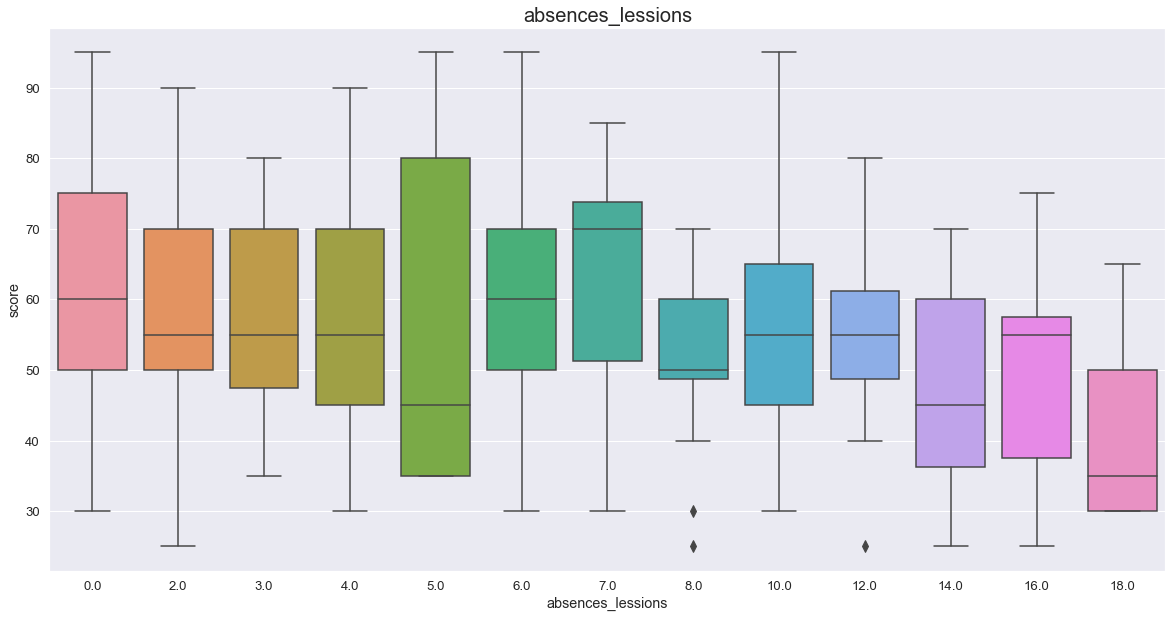

In [63]:
box_plot('absences_lessions', 'score', size=(20, 10))

### 1.2.9. `activities`

Дополнительные внеучебные занятия (yes (`1`) или no (`0`)).

|  Данные для показателя activities |
Для показателя activities количество пропущенных значений: 12 из 350 
В пропущенных значениях 3.4 % записей. 
Количество уникальных значений: 2


array([ 0.,  1., nan])

1.0    171
0.0    167
Name: activities, dtype: int64

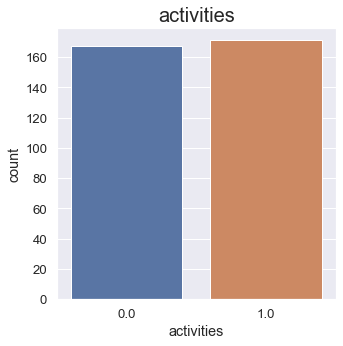

In [64]:
display_data('activities')


Видно, что дополнительные внеучебные занятия посещают примерно половина учеников.

Text(0.5, 1.0, 'activities')

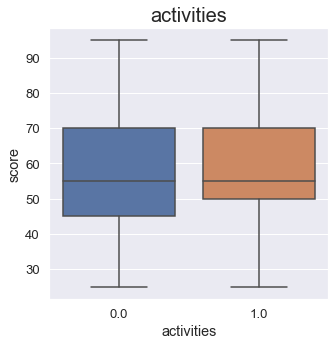

In [65]:
box_plot('activities', 'score')


График показывает, что в среднем минимальная оценка за экзамен у учеников посещающих дополнительные внеучебные занятия выше на 5 баллов и составляет 50 против 45.

Заполним пустые значения по следующему условию:
- если оценка по математике __меньше 50__, то ученик __не посещал__ дополнительные внеучебные занятия;
- если оценка по математике __больше или равна 50__, то ученик __посещал__ дополнительные внеучебные занятия.

In [66]:
# отфильтруем датасет по пустым значениям в activities
activities_nan = df[df.activities.isnull()]
# заполним NaN значениями согласно условию выше
for index in activities_nan.index:
    if df.loc[index].score < 50:  # если оценка по математике меньше 50
        df.loc[index, 'activities'] = 0  # то не посещал activities
    elif df.loc[index].score >= 50:  # если оценка больше или равна 50
        df.loc[index, 'activities'] = 1  # то посещал activities


### 1.2.10. `nursery`

Посещал детский сад (yes - 1 или no - 0)

|  Данные для показателя nursery |
Для показателя nursery количество пропущенных значений: 12 из 350 
В пропущенных значениях 3.4 % записей. 
Количество уникальных значений: 2


array([ 1.,  0., nan])

1.0    270
0.0     68
Name: nursery, dtype: int64

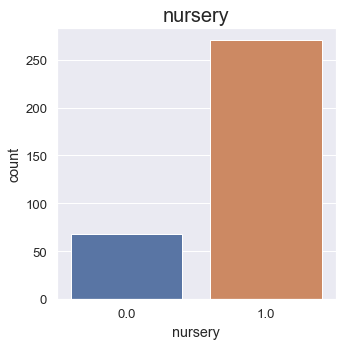

In [67]:
display_data('nursery')

Значительно большая часть  учеников посещала детский сад.

Проверим влияние посещения детского сада на оценку по математике:

In [68]:
# корреляция nersery и score
df[['nursery', 'score']].corr()


,nursery,score
nursery,1.000000,0.030016
score,0.030016,1.000000


Text(0.5, 1.0, 'nursery')

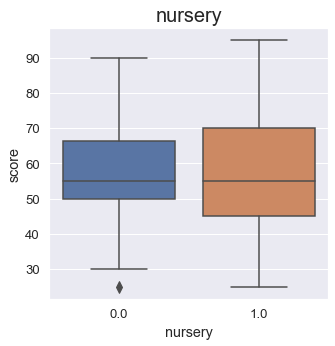

In [69]:
# распределение значения nyrsery по целевому признаку
box_plot('nursery', 'score')


Посещение детского сада не даёт не даёт существенного отличия оценок по экзамену от оценок школьников, которые детский сад не посещали.

На основании этих данных __удалим столбец__ `nursery`. 

In [70]:
del_column('nursery')


In [71]:
df_info()


Всего записей в датасете: 350
Всего столбцов: 25


### 1.2.11. `health`

Текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо).

|  Данные для показателя health |
Для показателя health количество пропущенных значений: 13 из 350 
В пропущенных значениях 3.7 % записей. 
Количество уникальных значений: 5


array([ 3.,  5.,  1.,  2.,  4., nan])

5.0    124
3.0     81
4.0     53
1.0     44
2.0     35
Name: health, dtype: int64

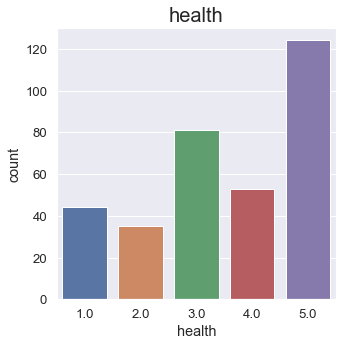

In [72]:
display_data('health')

Посмотрим на распределение состояния здоровья по полученным оценкам за экзамен.

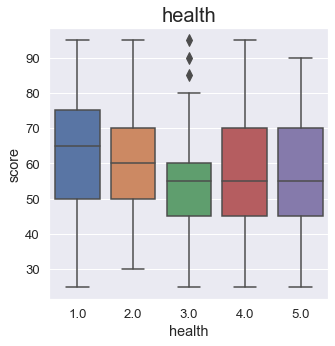

In [73]:
box_plot('health', 'score');


In [74]:
# проверим на корреляцию  велеичину оценки и состояние здоровья
df[['health', 'score']].corr()


,health,score
health,1.00000,-0.08141
score,-0.08141,1.00000


Корреляция состояния здоровья перед экзаменом с оценкой по экзамену очень слабая и обратнопропорциональная. Т.е. чем хуже себя чувствует ученик, тем лучше оценку он получает.

Плохое и очень плохое состояние здоровья дают не много лучшую оценку, чем хорошее и отличное. Удовлетворительное состояние здоровья даёт в среднем более низкую оценку по экзамену, чем в остальных случаях.

Информация выглядит противоречивой, скорее всего ученики дают не верную информацию о своем здоровье, по этому удалим столбец `health`:

In [75]:
del_column('health')


### 1.2.12. `address`

Тип адреса ученика ('U' - городской, 'R' - за городом)

|  Данные для показателя address |
Для показателя address количество пропущенных значений: 14 из 350 
В пропущенных значениях 4.0 % записей. 
Количество уникальных значений: 2


array(['u', nan, 'r'], dtype=object)

u    263
r     73
Name: address, dtype: int64

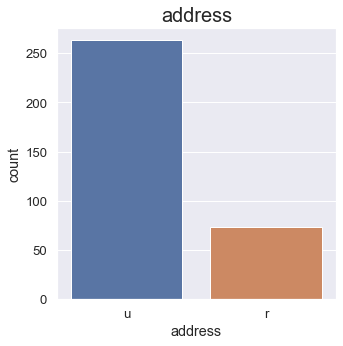

In [76]:
display_data('address')

Text(0.5, 1.0, 'address')

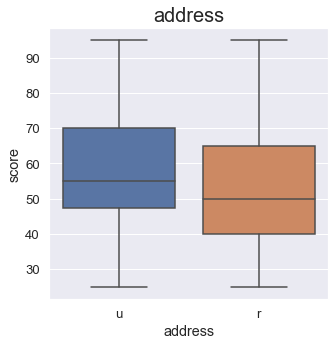

In [77]:
box_plot('address', 'score', size=(5, 5))


Заполним пустые значения на основе среднего балла:
- __u__, если оценка за экзамен больше или равна 55
- __r__, если оценка за экзамен меньше 55

In [78]:
# отфильтруем датасет по пустым значениям в address
address_nan = df[df.address.isnull()]
# заполним NaN значениями согласно условию выше
for index in address_nan.index:
    if df.loc[index].score >= 55:  # если оценка больше или равна 55
        df.loc[index, 'address'] = 'u'  # то адрес городской
    elif df.loc[index].score < 55:  # если оценка меньше 55
        df.loc[index, 'address'] = 'r'  # то адрес за городом


Адрес у нас бинарный показатель. Заменим строковые данные на числовые:
- 1 - 'u'
- 0 - 'r'

In [79]:
fix_binary('address', 'r', 'u')


### 1.2.13. `reason`

Причина выбора школы:
- 'home' - близость к дому,
- 'reputation' - репутация школы,
- 'course' - образовательная программа,
- 'other' - другое.

|  Данные для показателя reason |
Для показателя reason количество пропущенных значений: 15 из 350 
В пропущенных значениях 4.3 % записей. 
Количество уникальных значений: 4


array(['course', 'other', 'home', 'reputation', nan], dtype=object)

course        119
reputation     94
home           89
other          33
Name: reason, dtype: int64

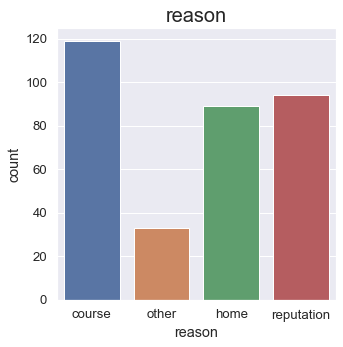

In [80]:
display_data('reason')


Text(0.5, 1.0, 'reason')

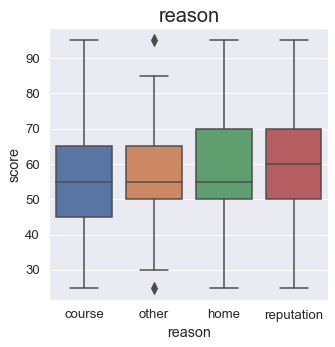

In [81]:
box_plot('reason', 'score')


Заполним пустые данные о предпочтении школы по следующему условию:
- course, если оценка меньше 50,
- other, если оценка больше или равна 50, но меньше 55,
- home, если оценка больше или равна 55, но меньше 60,
- reputation, если оценка больше или равна 60.

In [82]:
# заменим NaN в reason по условию выше
# отфильтруем датасет по пустым значениям в reason
reason_nan = df[df.reason.isnull()]
# заполним NaN значениями согласно условию выше
for index in reason_nan.index:
    if df.loc[index].score < 50:
        df.loc[index, 'reason'] = 'course'
    elif df.loc[index].score >= 50 and df.loc[index].score < 55:
        df.loc[index, 'reason'] = 'other'
    elif df.loc[index].score >= 55 and df.loc[index].score < 60:
        df.loc[index, 'reason'] = 'home'
    elif df.loc[index].score >= 60:
        df.loc[index, 'reason'] = 'reputation'


### 1.2.14. `mother_job`

Работа матери:
- 'teacher' - учитель,
- 'health' - сфера здравоохранения,
- 'services' - гос. служба, 
- 'at_home' - не работает,
- 'other' - другое.

Для удобства преобразуем строковые данные в числовые:
- teacher - 4,
- health - 3,
- services - 2,
- at_home - 1,
- other - 0.

In [83]:
fix_job('mother_job')


|  Данные для показателя mother_job |
Для показателя mother_job количество пропущенных значений: 17 из 350 
В пропущенных значениях 4.9 % записей. 
Количество уникальных значений: 5


array([ 1.,  3.,  0.,  2.,  4., nan])

0.0    114
2.0     90
4.0     51
1.0     49
3.0     29
Name: mother_job, dtype: int64

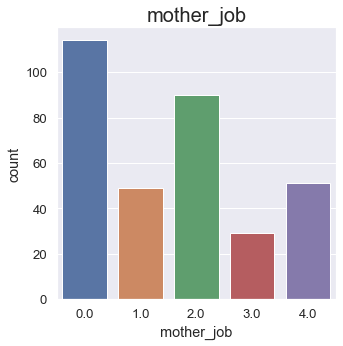

In [84]:
# посмотрим на имеющиеся записи по параметру mother_job
display_data('mother_job')

Посмотрим на распределение значений работы матери по целевому признаку:

Text(0.5, 1.0, 'mother_job')

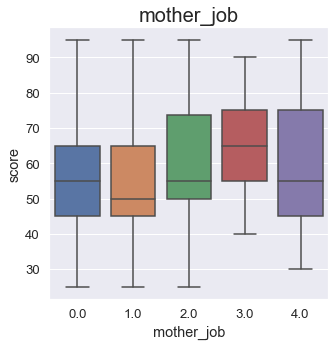

In [85]:
box_plot('mother_job', 'score')


По графику видно, что у школьников чья мать работает учителем, в здравоохранении или на гос. службе средняя оценка по экзамену выше, чем у школьников, у которых мать не работает или работает на другой работе.

Проверрим с каким показателем лучше всего коррелирует работа матери и заполним пустые записи:

In [86]:
df.corr().mother_job.sort_values()


school_support         -0.156476
traveltime             -0.083278
romantic               -0.063253
failures               -0.060408
studytime              -0.058680
family_relationships   -0.046634
absences_lessions       0.019223
friends_time            0.050693
higher_purpose          0.076193
address                 0.078980
freetime                0.085247
activities              0.110181
score                   0.149199
father_edu              0.161129
family_support          0.161497
internet                0.163387
paid                    0.207828
mother_edu              0.514647
mother_job              1.000000
Name: mother_job, dtype: float64

Очень высокий показатель корреляции работы матери (`mother_job`) с образованием матери (`mother_edu`).
Для заполнения пропусков в `mother_job` скопируем значения у показателя `mother_edu`:

In [87]:
# отфильтруем датасет по пустым значениям в mother_job
mjob_nan = df[df.mother_job.isnull()]
for index in mjob_nan.index:
    df.loc[index, 'mother_job'] = df.loc[index, 'mother_edu']


### 1.2.15. `higher_purpose`

Хочет получить высшее образование:
- yes - 1,
- no - 0.

Показатель `higher_purpose`, относится к мотивационным признакам. Мотивация - мощный фактор, помогающий человеку достьчь лучших результатов. Проверим это на оценках за экзамен.

|  Данные для показателя higher_purpose |
Для показателя higher_purpose количество пропущенных значений: 19 из 350 
В пропущенных значениях 5.4 % записей. 
Количество уникальных значений: 2


array([ 1., nan,  0.])

1.0    318
0.0     13
Name: higher_purpose, dtype: int64

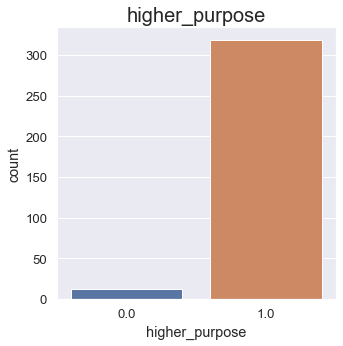

In [88]:
display_data('higher_purpose')


Проверим распределение показателя по данным о результатах экзамена по математике:

Text(0.5, 1.0, 'higher_purpose')

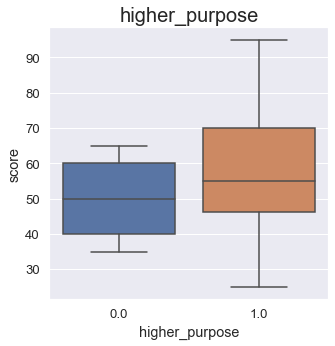

In [89]:
# отобразим на графике
box_plot('higher_purpose', 'score')


Как и было предположено, мотивация довольно сильный фактор, положительно влияющий на оценку. Но при этом у незамотивированных школьников минимальная оценка за экзамен выше и составляет 35 баллов.

In [90]:
# поверим higher_purpose на корреляцию c другими показателями
df.corr().higher_purpose.sort_values()


failures               -0.318320
traveltime             -0.130921
romantic               -0.062508
family_relationships   -0.013946
absences_lessions      -0.005382
freetime                0.010917
friends_time            0.017806
activities              0.024741
address                 0.042499
school_support          0.044548
mother_job              0.075962
internet                0.091709
father_edu              0.094111
score                   0.106596
family_support          0.125529
studytime               0.134001
paid                    0.182363
mother_edu              0.205889
higher_purpose          1.000000
Name: higher_purpose, dtype: float64

Наблюдается сильная корреляция желания школьника получить высшее образование с образованием матери. Построим boxplot с распределением этих двух показателей:

Text(0.5, 1.0, 'higher_purpose')

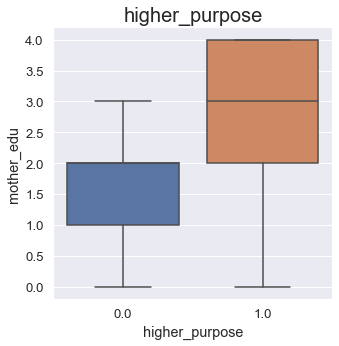

In [91]:
box_plot('higher_purpose', 'mother_edu')


Заполним пустые данные в столбце `higher_purpose`, используя данные из столбца `mother_edu` по следующему условию:
- `0`, если образование матери меньше или равно 2,
- `1`, если образование матери больше 2.

In [92]:
# отфильтруем датасет по пустым записям в 'higher purpose'
higher_nan = df[df.higher_purpose.isnull()]
# запишем данные в пустые значения
for index in higher_nan.index:
    if df.loc[index, 'mother_edu'] <= 2:  # если mother_edu меньше или равно 2
        df.loc[index, 'higher_purpose'] = 0  # школьник не хочет получить высшее образование
    elif df.loc[index, 'mother_edu'] > 2:  # если mother_edu больше 2
        df.loc[index, 'higher_purpose'] = 1  # школьник хочет получить высшее образование


### 1.2.16 `failures`

Количество внеучебных неудач (n, если 1<=n<=3, иначе 0).

|  Данные для показателя failures |
Для показателя failures количество пропущенных значений: 20 из 350 
В пропущенных значениях 5.7 % записей. 
Количество уникальных значений: 4


array([ 0.,  3., nan,  2.,  1.])

0.0    272
1.0     38
2.0     10
3.0     10
Name: failures, dtype: int64

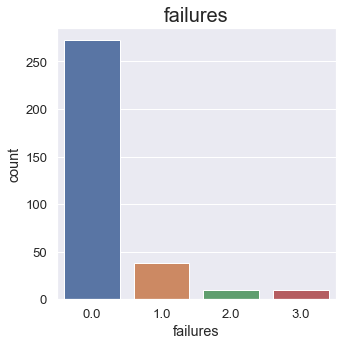

In [93]:
display_data('failures')

Проверим на распределение по  целевому признаку:

Text(0.5, 1.0, 'failures')

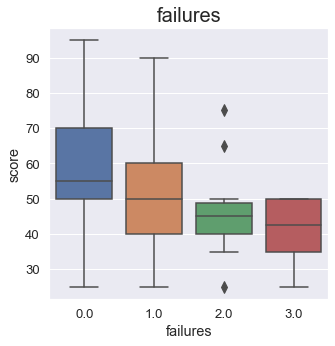

In [94]:
box_plot('failures', 'score')


Запишем пустые значения в `failures` по следующему условию:
- `0`, если оценка за экзамен по математике больше или равна 55 баллам,
- `1`, если оценка равна 50 баллам,
- `2`, если оценка равна 45 баллам,
- `3`, если оценка меньше 45 баллов

In [95]:
# отфильтруем датасет по пустым значениям в failures
failures_nan = df[df.failures.isnull()]
# запишем пустые значения failures согласно условию выше
for index in failures_nan.index:
    if df.loc[index, 'score'] >= 55:
        df.loc[index, 'failures'] = 0
    elif df.loc[index, 'score'] == 50:
        df.loc[index, 'failures'] = 1
    elif df.loc[index, 'score'] == 45:
        df.loc[index, 'failures'] = 2
    elif df.loc[index, 'score'] < 45:
        df.loc[index, 'failures'] = 3


### 1.2.17. `father_edu`

Образование отца ученика:

- 0 - нет,

- 1 - 4 класса,

- 2 - 5-9 классы,

- 3 - среднее специальное или 11 классов,

- 4 - высшее.

|  Данные для показателя father_edu |
Для показателя father_edu количество пропущенных значений: 21 из 350 
В пропущенных значениях 6.0 % записей. 
Количество уникальных значений: 6


array([ 4.,  1.,  2.,  3., 40., nan,  0.])

2.0     94
3.0     87
4.0     80
1.0     65
0.0      2
40.0     1
Name: father_edu, dtype: int64

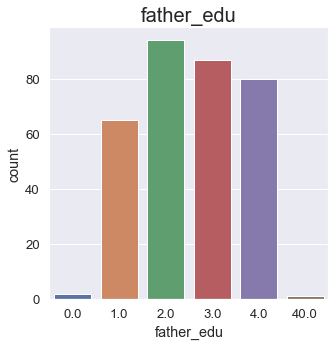

In [96]:
display_data('father_edu')

У нас есть одно нехарактерное значение - `40.0`.
Это очень похоже на ошибку ввода и правильным значением должно было быть `4.0`. Исправим эту запись:

In [97]:
# найдём эту запись и посмотрим её индекс
df[df.father_edu == 40]


,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,higher_purpose,internet,romantic,family_relationships,freetime,friends_time,absences_lessions,score
11,1,gt3,NaN,2.0,40.0,2.0,other,reputation,father,3.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,2.0,2.0,4.0,60.0


In [98]:
# перепишем записи с индексом 11 параметр father_edu на 4.0
df.loc[11, 'father_edu'] = 4.0


Посмотрим на графике, как оценка по математике зависит от образования отца:

Text(0.5, 1.0, 'father_edu')

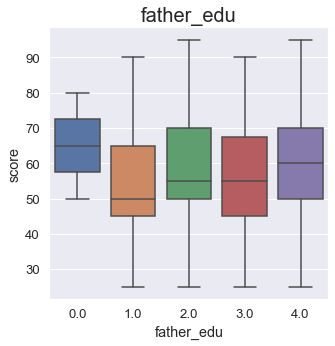

In [99]:
box_plot('father_edu', 'score')


График очень похож на аналогичный по столбцу 'mother_edu', коорый мы рассматривали выше в пункте 1.2.3. В нём вы высказали предположение о высокой корреляции межу образванием отца и матери. Проверим это:

In [100]:
df[['mother_edu', 'father_edu']].corr()


,mother_edu,father_edu
mother_edu,1.000000,0.608873
father_edu,0.608873,1.000000


Так и есть - корреляция 0,61. Следовательно удалим столбец `'father_edu'`

In [101]:
del_column('father_edu')


In [102]:
df_info()


Всего записей в датасете: 350
Всего столбцов: 23


###  1.2.18.  `father_job`

Работа отца:

- 'teacher' - учитель,
- 'health' - сфера здравоохранения,
- 'services' - гос. служба,
- 'at_home' - не работает,
- 'other' - другое.

Для удобства преобразуем строковые данные в числовые:

- teacher - 4,
- health - 3,
- services - 2,
- at_home - 1,
- other - 0.

In [103]:
# применим нашу функцию fix_job
fix_job('father_job')


|  Данные для показателя father_job |
Для показателя father_job количество пропущенных значений: 30 из 350 
В пропущенных значениях 8.6 % записей. 
Количество уникальных значений: 5


array([ 4.,  0., nan,  3.,  2.,  1.])

0.0    176
2.0     89
4.0     26
3.0     15
1.0     14
Name: father_job, dtype: int64

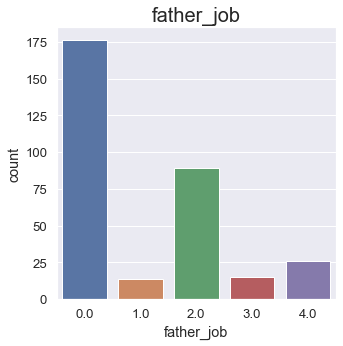

In [104]:
display_data('father_job')


Для заполнения пустых записей проверим с каким столбцом больше всего коррелирует father_job:

In [105]:
df.corr().father_job.sort_values()


traveltime             -0.074144
family_relationships   -0.054446
paid                   -0.030296
absences_lessions      -0.029260
studytime              -0.028658
failures               -0.026179
freetime               -0.012900
higher_purpose          0.022735
internet                0.036800
romantic                0.038192
friends_time            0.040937
address                 0.048636
family_support          0.055159
activities              0.076902
school_support          0.084043
score                   0.105052
mother_edu              0.221122
mother_job              0.259823
father_job              1.000000
Name: father_job, dtype: float64

Самая лучшая корреляция со столбцом mother_job (работа матери).
Заполним пропущенные данные в записях father_job аналогичными из mother_job:

In [106]:
fjob_nan = df[df.father_job.isnull()]
for index in fjob_nan.index:
    df.loc[index, 'father_job'] = df.loc[index, 'mother_job']


Text(0.5, 1.0, 'father_job')

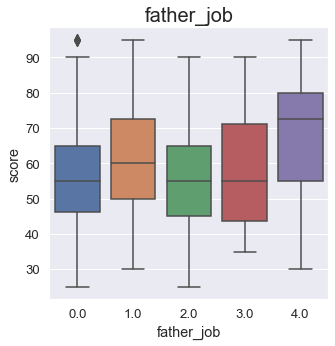

In [107]:
box_plot('father_job', 'score')


### 1.2.19. `traveltime`

Время в пути до школы:
- 1 - <15 мин.,
- 2 - 15-30 мин.,
- 3 - 30-60 мин.,
- 4 - >60 мин.

|  Данные для показателя traveltime |
Для показателя traveltime количество пропущенных значений: 23 из 350 
В пропущенных значениях 6.6 % записей. 
Количество уникальных значений: 4


array([ 2.,  1.,  3., nan,  4.])

1.0    217
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

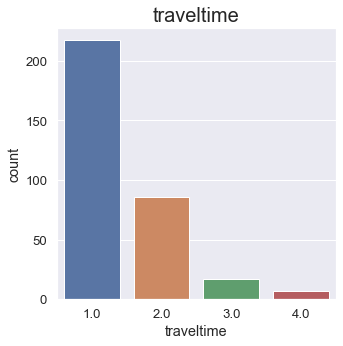

In [108]:
display_data('traveltime')


Больше всего учеников тратят на дорогу до школы меньше 15 минут.

Заполним пустые записи в traveltime медианой данного показателя:

In [109]:
traveltime_nan = df[df.traveltime.isnull()]
for index in traveltime_nan.index:
    df.loc[index, 'traveltime'] = df.traveltime.median()


Text(0.5, 1.0, 'traveltime')

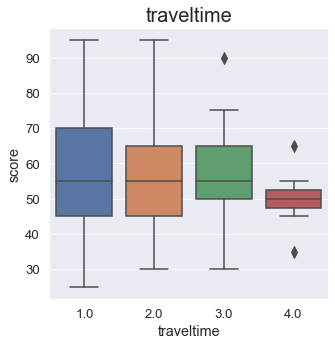

In [110]:
box_plot('traveltime', 'score')


### 1.2.20. `family_relationships`

Семейные отношения (от 1 - очень плохо до 5 - очень хорошо).

|  Данные для показателя family_relationships |
Для показателя family_relationships количество пропущенных значений: 24 из 350 
В пропущенных значениях 6.9 % записей. 
Количество уникальных значений: 6


array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

 4.0    162
 5.0     88
 3.0     55
 2.0     14
 1.0      6
-1.0      1
Name: family_relationships, dtype: int64

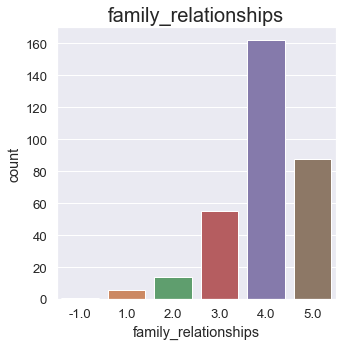

In [111]:
display_data('family_relationships')


В одной записе есть нехарактерное значение - `-1.0`. Скорее всего это опечатка, поэтому заменим его на похожее верное `1`:

In [112]:
# найдем строку, где family_relationships равно -1
df[df.family_relationships == -1]


,address,family_size,parents_status,mother_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,higher_purpose,internet,romantic,family_relationships,freetime,friends_time,absences_lessions,score
25,1,gt3,NaN,2.0,2.0,2.0,home,mother,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,2.0,2.0,14.0,40.0


In [113]:
# исправим -1 на 1
df.loc[25, 'family_relationships'] = 1


Text(0.5, 1.0, 'family_relationships')

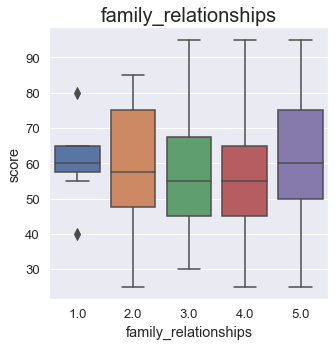

In [114]:
box_plot('family_relationships', 'score')


### 1.2.21. `family_size`

Размер семьи (`family_size`):
- 'le3' - меньше или равно трём членам,
- 'gt3' - больше трёх членов.

|  Данные для показателя family_size |
Для показателя family_size количество пропущенных значений: 24 из 350 
В пропущенных значениях 6.9 % записей. 
Количество уникальных значений: 2


array([nan, 'gt3', 'le3'], dtype=object)

gt3    226
le3    100
Name: family_size, dtype: int64

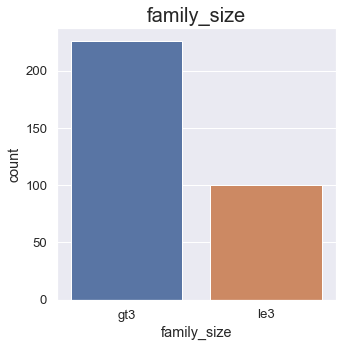

In [115]:
display_data('family_size')


Проверим влияние размера семьи на целевой показатель:

Text(0.5, 1.0, 'family_size')

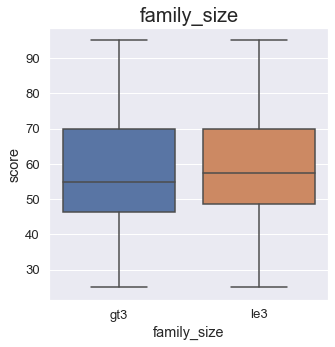

In [116]:
box_plot('family_size', 'score')


Видно, что размер семьи совсем не влияет на оценку по экзамену. То малое число пропусков в данных не способно изменить положение, следовательно __удалим столбец__ `family_size`:

In [117]:
del_column('family_size')


### 1.2.22. `parents_status`

Статус совместного проживания родителей (`parents_status`):
- 't' - живут вместе,
- 'a' - раздельно.

|  Данные для показателя parents_status |
Для показателя parents_status количество пропущенных значений: 41 из 350 
В пропущенных значениях 11.7 % записей. 
Количество уникальных значений: 2


array(['a', nan, 't'], dtype=object)

t    275
a     34
Name: parents_status, dtype: int64

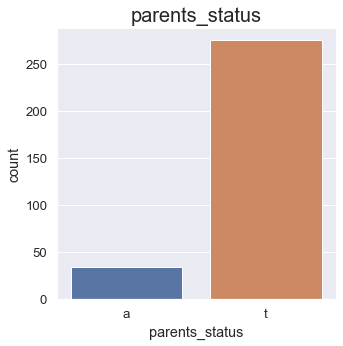

In [118]:
display_data('parents_status')


Проверим как влияет статус совместного проживания родителей на целевой показатель:

Text(0.5, 1.0, 'parents_status')

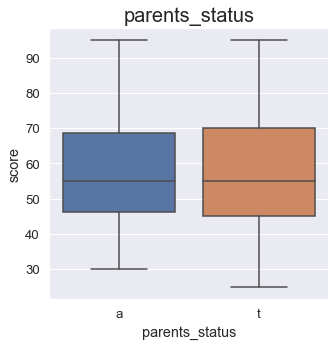

In [119]:
box_plot('parents_status', 'score')


Ситуация аналогична показателю 'family_size'. Следовательно также __удалим столбец__ `parents_status`:

In [120]:
del_column('parents_status')


### 1.2.23. `guardian`

Опекун:
- 'mother' - мать,
- 'father' - отец,
- 'other' - другое.

|  Данные для показателя guardian |
Для показателя guardian количество пропущенных значений: 29 из 350 
В пропущенных значениях 8.3 % записей. 
Количество уникальных значений: 3


array(['mother', 'father', 'other', nan], dtype=object)

mother    223
father     78
other      20
Name: guardian, dtype: int64

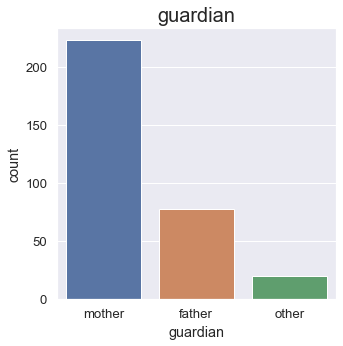

In [121]:
display_data('guardian')


Text(0.5, 1.0, 'guardian')

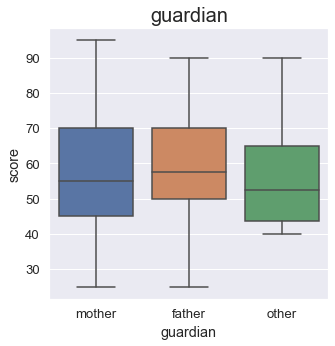

In [122]:
box_plot('guardian', 'score')


На графике видно, что для оценки по математике не имеет значения кто опекун у школьника. Следовательно __удалим столбец__ `guardian`

In [123]:
del_column('guardian')


### 1.2.24. `internet`

Наличие интернета дома:
- 1 - yes,
- 2 - no.

|  Данные для показателя internet |
Для показателя internet количество пропущенных значений: 29 из 350 
В пропущенных значениях 8.3 % записей. 
Количество уникальных значений: 2


array([nan,  1.,  0.])

1.0    272
0.0     49
Name: internet, dtype: int64

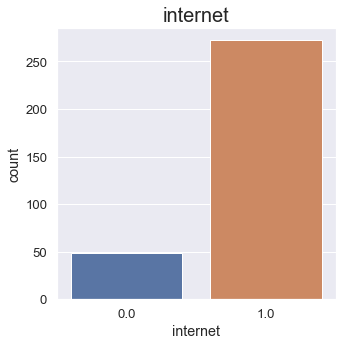

In [124]:
display_data('internet')


Проверим как интернет влияет на оценку по математике:

Text(0.5, 1.0, 'internet')

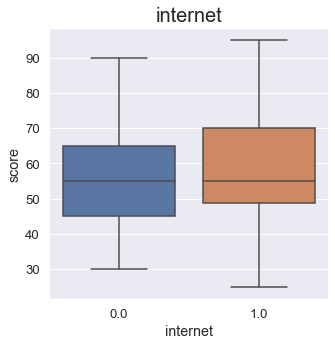

In [125]:
box_plot('internet', 'score')


Наличие интернета не оказывает значительного влияния на оценку за экзамен по математике. __Удалим столбец__ `internet`.

In [126]:
del_column('internet')


### 1.2.25. `romantic`

Ученик в романтических отношениях:
- 1 - yes,
- 2 - no.

|  Данные для показателя romantic |
Для показателя romantic количество пропущенных значений: 29 из 350 
В пропущенных значениях 8.3 % записей. 
Количество уникальных значений: 2


array([ 0., nan,  1.])

0.0    218
1.0    103
Name: romantic, dtype: int64

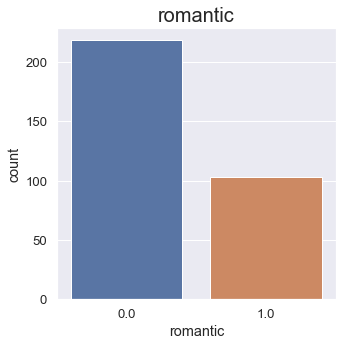

In [127]:
display_data('romantic')


Посмотрим на влияние романтических отношений на оценку за экзамен:

Text(0.5, 1.0, 'romantic')

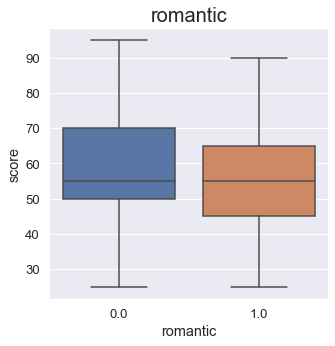

In [128]:
box_plot('romantic', 'score')


Наличие романтических отношений ухудшает оценку ученика примерно на 5 баллов.

### 1.2.26 `family_support`

Семейная образовательная поддержка:
- 1 - yes,
- 0 - no.

|  Данные для показателя family_support |
Для показателя family_support количество пропущенных значений: 36 из 350 
В пропущенных значениях 10.3 % записей. 
Количество уникальных значений: 2


array([ 0.,  1., nan])

1.0    196
0.0    118
Name: family_support, dtype: int64

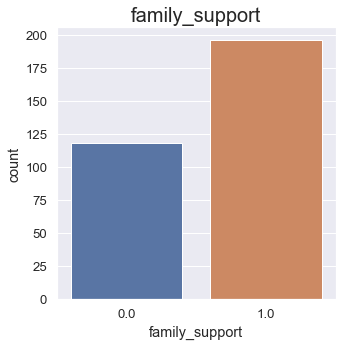

In [129]:
display_data('family_support')


Проверим на сколько семейная образовательная поддержка помогает улучшить оценку по математике:

Text(0.5, 1.0, 'family_support')

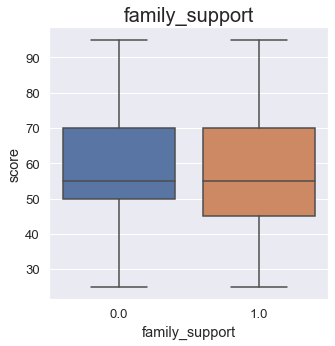

In [130]:
box_plot('family_support', 'score')


Судя по графику, семейная образовательная поддержка не влияет на оценку школьника.

### 1.2.27. `paid`

Дополнительные платные занятия по математике:
- 1 - yes,
- 0 - no.

|  Данные для показателя paid |
Для показателя paid количество пропущенных значений: 36 из 350 
В пропущенных значениях 10.3 % записей. 
Количество уникальных значений: 2


array([ 0., nan,  1.])

0.0    169
1.0    145
Name: paid, dtype: int64

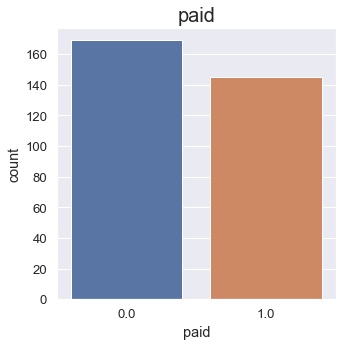

In [131]:
display_data('paid')


Число учеников, которые воспользовались платными дополнительными занятиями, примерно половина.
Проверим как это повлияло на оценку:

Text(0.5, 1.0, 'paid')

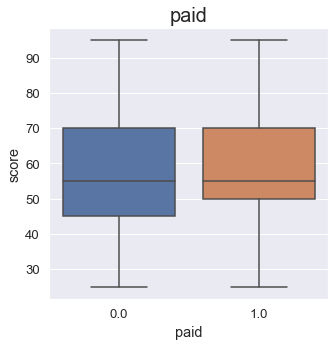

In [132]:
box_plot('paid', 'score')


Видно, что платные занятия помогают подтянуть оценку у "слабых" учеников на 5 баллов. Для остальных школьников платные занятия не повлияли на оценку.

## 2. Корреляционный анализ¶

Выясним, какие столбцы коррелируют с оценкой за экзамен по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Практически все столбцы переведены в числовые, по-этому у нас их весьма много. Для удобства отразим корреляцию на тепловой карте:

<AxesSubplot:>

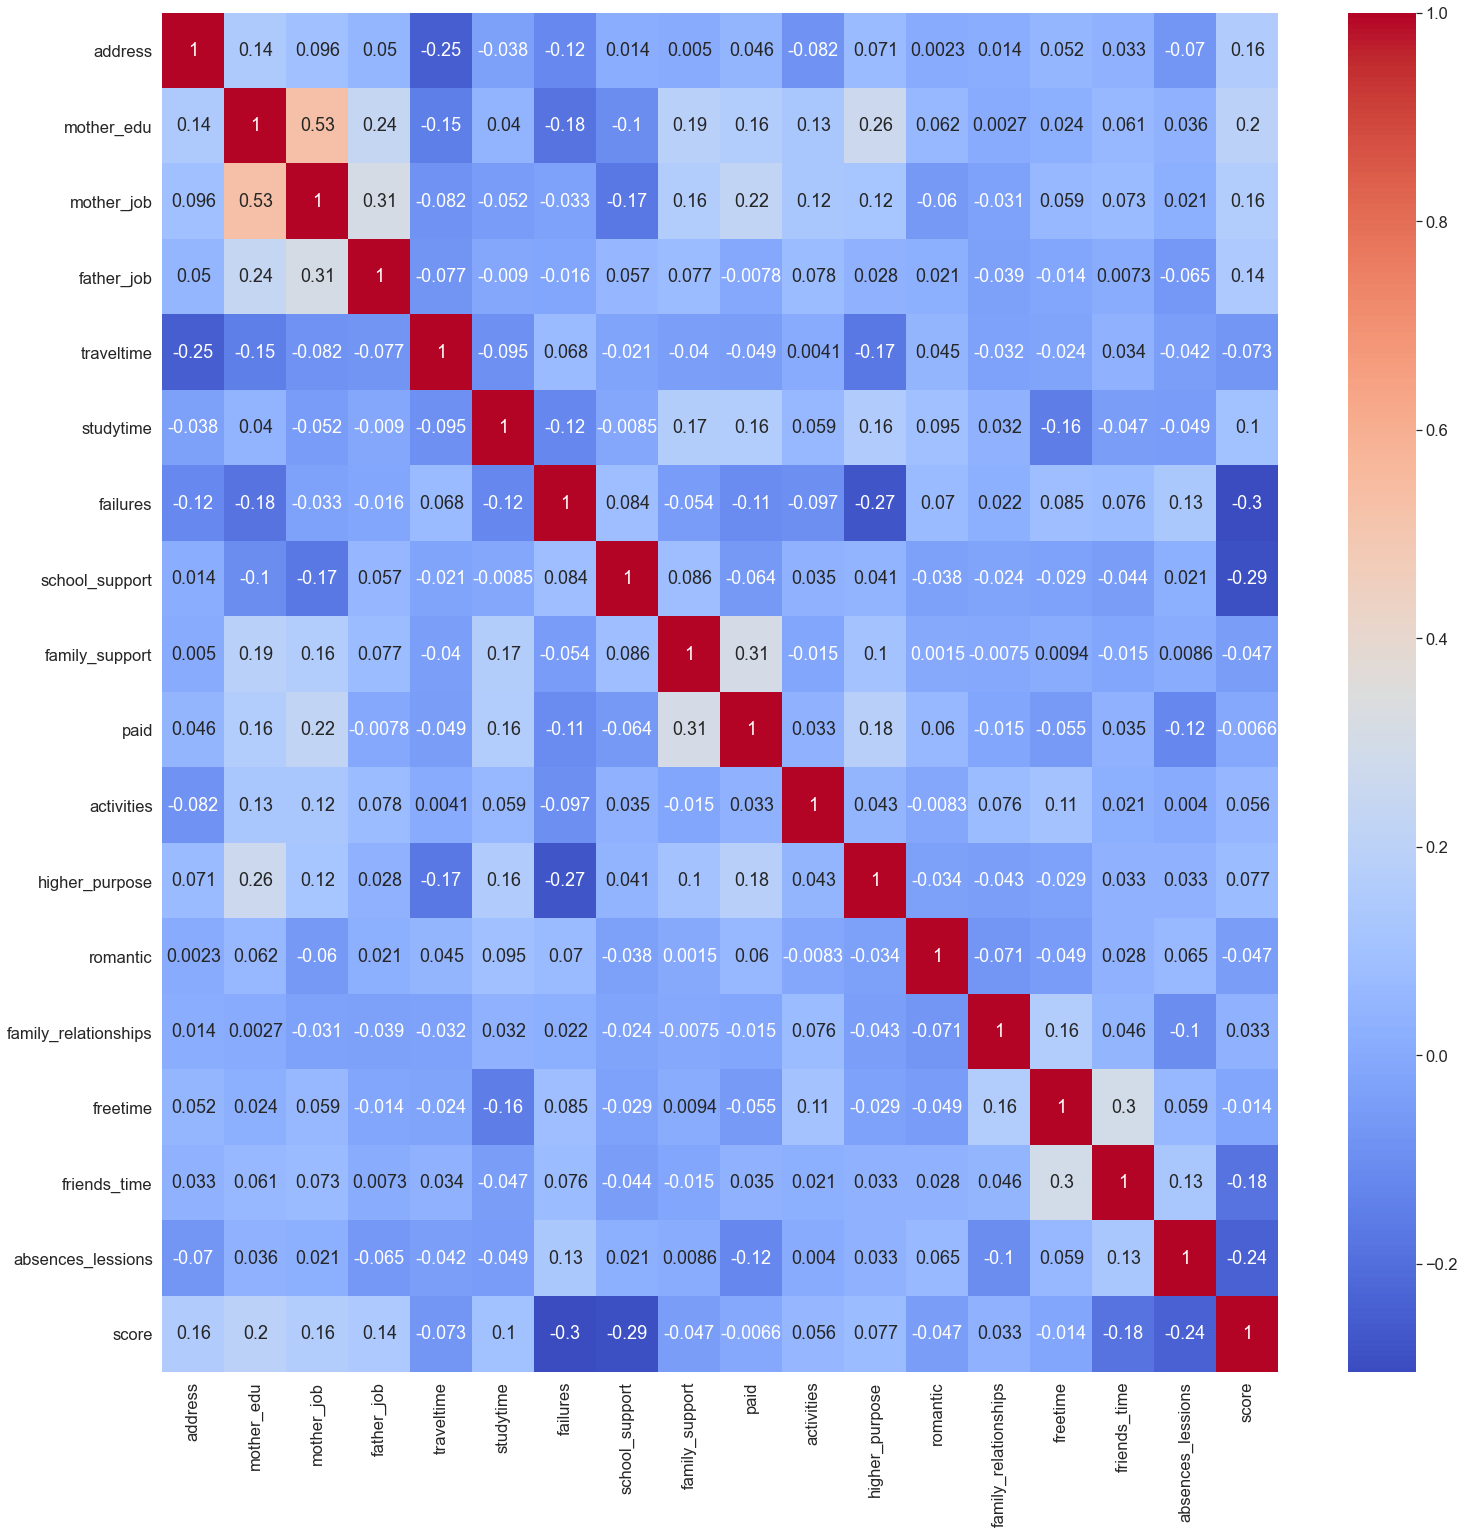

In [133]:
sns.set(font_scale=1.5)  # сделаем шрифт покрупнее
plt.figure(figsize=(25, 25))  # установим размер области для графика
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')  # создадим тепловую карту с корреляцией для датасета


Столбцы mother_edu и mother_job весьма сильно скоррелированы. Оставим один из них - mother_edu, а mother_job удалим:

In [134]:
del_column('mother_job')


Вернём данным строковые значения, у которых онибыли изменены на числовые:

In [135]:
restore_str('address', val0='r', val1='u')  # вернули u/r для address
restore_str('school_support', val0='no', val1='yes')  # вернули yes/no для school_support


## Выводы.

Исходя из графика корреляции лучше всего для будущей модели подходят следующие столбцы:

- address - У городских школьников оценка за экзамен по математике в среднем на 5 баллов выше, чем у школьников из-за города.


- mother_edu - Образование матери помогает улучшить оценку благодаря помощи матери дома с выполнением заданий по математике и подготовке к экзамену.


- father_job - Работа отца учителем сильно помогает с получением более высокой оценки по математике. Это может быть свяано как с тем, при домашних занятиях родители профессиональные учители лучше помогают школьнику, чем родители без профессиональных педагогических навыков.


- studytime - Чем больше занимается школьник после занятий, тем меньше у него внеучебных неудач. Школьники, которые тратят минимум времени на доп. обучение подвержены внеучебным неудачам.


- failures - Каждый балл внеучебной неудачи уменьшает среднюю оценку по экзамену на 5 баллов.


- school_support - Доп. образовательная поддержка помогает улучшить оценку учеников, которые испытывают большие трудности с освоением математики, чем остальные школьники.


- friends_time - Большое времяпрепровождения с друзьями, оставляет школьнику меньше времени на учебу и понижает оценку по на 5-10 баллов.


- absences_lessions - Прогулы (даже в не больших количествах) негативно влияют на оценку школьников.


- score - Целевой показатель.

Учитывая полученные даннные, важными переменными, которые, возможно, оказывают влияние на результат экзамена по математике у школьников, это:

`address`

`mother_edu`

`father_job`

`studytime`

`failures`

`school_support`

`friends_time`

`absences_lessions`

In [136]:
math_for_model = df[['address',
                     'mother_edu',
                     'father_job',
                     'studytime',
                     'failures',
                     'school_support',
                     'friends_time',
                     'absences_lessions']]
math_for_model.head()


,address,mother_edu,father_job,studytime,failures,school_support,friends_time,absences_lessions
0,u,4.0,4.0,2.0,0.0,yes,4.0,6.0
1,u,1.0,0.0,2.0,0.0,no,3.0,4.0
2,u,1.0,0.0,2.0,3.0,yes,2.0,10.0
3,u,4.0,3.0,3.0,0.0,no,2.0,2.0
4,u,3.0,0.0,2.0,0.0,no,2.0,4.0


------------------------------------
Используя функцию `get_stat_dif` из курса обучения проанализируем датасет с применением теста Стьюдента на пригодные данные для будущей модели:

In [137]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


In [138]:
for col in df.columns:
    get_stat_dif(col)
    

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки father_job
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки school_support
Найдены статистически значимые различия для колонки friends_time
Найдены статистически значимые различия для колонки score
